# Dateien

Das Modul numpy stellt Funktionen zum lesen und schreiben von strukturierten Textdateien bereit. 

In [3]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt

## Lesen

Zum lesen von strukturierten Textdateien, z.B. im CSV-Format (*comma separated values*), kann die [`np.loadtxt`-Funktion](https://numpy.org/doc/1.18/reference/generated/numpy.loadtxt.html?highlight=loadtxt#numpy.loadtxt) verwendet werden. Diese bekommt als Argumente den einzulesenden Dateinamen und weitere Optionen zur Definition der Struktur der Daten. Der Rückgabewert ist ein (mehrdimensionales) Array.

Im folgenden Beispiel wird die Datei <a href="./TC01.csv" download>TC01.csv</a> eingelesen und deren Inhalt graphisch dargestellt. Die erste Zeile der Datei wird dabei ignoriert, da sie als Kommentar – eingeleitet durch das `#`-Zeichen – interpretiert wird.

In [4]:
dateiname = 'TC01.csv'
daten = np.loadtxt(dateiname)

In [5]:
print("Daten:", daten)
print("Form:", daten.shape)

Daten: [20.1 20.1 20.1 ... 24.3 24.2 24.2]
Form: (1513,)


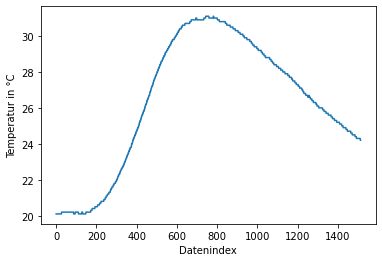

In [6]:
plt.plot(daten)
plt.xlabel('Datenindex')
plt.ylabel('Temperatur in °C');

## Schreiben

Zum Schreiben von Arrays in Dateien kann die in numpy verfügbare [Funktion `np.savetxt`](https://numpy.org/doc/1.18/reference/generated/numpy.savetxt.html?highlight=savetxt#numpy.savetxt) verwendet werden. Dieser müssen mindestens die zu schreibenden Arrays als auch ein Dateiname übergeben werden. Darüber hinaus sind zahlreiche Formattierungs- bzw. Strukturierungsoptionen möglich. 

Folgendes Beispiel skaliert die oben eingelesenen Daten und schreib jeden zehnten Wert in eine Datei. Dabei wird auch ein Kommentar (`header`-Argument) am Anfang der Datei erzeugt. Das Ausgabeformat der Zahlen kann mit dem `fmt`-Argument angegeben werden. Das Format ähnelt der Darstellungsweise, welche bei den formatierten Zeichenketten vorgestellt wurde. 

In [7]:
wertebereich = np.max(daten) - np.min(daten)
daten_skaliert = ( daten - np.min(daten) ) / wertebereich
daten_skaliert = daten_skaliert[::10]

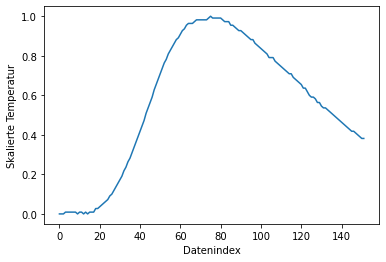

In [8]:
plt.plot(daten_skaliert)
plt.xlabel('Datenindex')
plt.ylabel('Skalierte Temperatur');

Beim schreiben der Datei wird ein mehrzeiliger Kommentar mithilfe des Zeilenumbruchzeichens `\n` definiert. Die Ausgabe der Gleitkommazahlen wird mit `%5.2f` formatiert, was 5 Stellen insgesamt und zwei Nachkommastellen entspricht.

In [9]:
# Zuweisung ist auf mehrere Zeilen aufgeteilt, aufgrund der 
# schmalen Darstellung im Skript
kommentar = f'Daten aus {dateiname} skaliert auf den Beriech' + \
             '0 bis 1\noriginales Min / Max:' + \
            f'{np.min(daten)}/{np.max(daten)}'
neu_dateiname = 'TC01_skaliert.csv'

np.savetxt(neu_dateiname, daten_skaliert, 
           header=kommentar, fmt='%5.2f')

Zum Veranschaulichen werden die ersten Zeilen der neuen Datei ausgegeben.

In [31]:
# Einlesen der ersten Zeilen der neu erstellten Datei
datei = open(neu_dateiname, 'r')
for i in range(10):
    print( datei.readline() , end='')
datei.close()

# Daten aus TC01.csv skaliert auf den Beriech 0 bis 1
# originales Min / Max: 20.1/31.1
 0.00
 0.00
 0.00
 0.01
 0.01
 0.01
 0.01
 0.01
